## Setup


### Overall (6 points)
- Uploaded HTML document resulting from the Rmd template: 1 pt
- Organization: 1 pts
- Readability of the text: 2 pts
- Readability of the code: 2 pts


### Load packages


In [1]:
library(ggplot2)
library(dplyr)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
load("brfss2013.RData")

# Part 1: Data

## Generalization



The present work will be dealing with some variables taken from the BRFSS 2013 survey. In particular, the analysis will be focused in the following aspects:
- Sodium intake and the risk which might present to the vascular system. Including heart attacks and strokes.
- Regular intakes of sugar-sweetened drinks, the link with diabetes and the potential confounding with fruit juice beverages.
- Impact of excersie in the population with asthma. Also, the link with flu vaccines -even if the relation is not clear- will be evaluated.

It is important to mention that since 2011, BRFSS surveys have changed. After this year, the methodology includes landline telephone and cellular telephone polls, due to the latter penetration over general public. In both cases, candidates are chosen **randomly**. BRFSS tries to perform a survey the most representative as possible, including people from all the states. It also weighs the over-sampled states to equalize representativeness.


The variables analyzed in the following paragraphs are not quite representative of the entire US population, since not all of the BRFSS surveys are applied in all of states. Some of the subsets used for the analysis are significantly reduced observational-wise. Thus, the results taken from this analysis are by no means generallizable. For further details, see the discussion of each paragraph.

Despite the efforts held by the BRFSS to take care of representativeness, there might be some bias inherent to the type of sampling done. Given the fact that not all the people contacted have responded the survey the following ones may appear:
- Representative for those who didn't responded.
- Voluntary Response, there are some people willing to respond.

### Data Quality

Over the years, some concers over the data quality have emerged. In response to them, there are several studies publicated, of what it can be mentioned:
- [Pierannunzi C, Hu S, Balluz L. A systematic review of publications assessing reliability and validity of the Behavioral Risk Factor Surveillance System (BRFSS), 2004–2011External] (http://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-13-49)

The authors findings, mention that the BRFSS prevalente rates are comparable to other US national surveys even bigger than the BRFSS. Some differences were found with physical metrics vs the reported data.

- Fahimi M, Link M, Schwartz DA, Levy P, Mokdad A. Tracking chronic disease and risk behavior prevalence as survey participation declines: statistics from the Behavioral Risk Factor Surveillance System and other national surveys. Prev Chronic Dis 2008; 5(3).

The differences analyzed have limited implications for the implementation of public health programs. In general terms, the range of estimations observed from the BRFSS survey are similar to the ones in the NHIS and NHANES, where participation of the target surveyed population is higher.

## Causality

As it will be demonstrated in the following paragraphs, some confounding variables have been analyzed to see how they interact between explanatory and response variables. However, this doesn't count the effect of other variables not analyzed in this work.

## References
Some of the ideas have been taken from the following page:

- [Frequently Asked Questions About Changes to the Behavioral Risk Factor Surveillance System](https://www.cdc.gov/surveillancepractice/reports/brfss/brfss_faqs.html)


## Kick Start

We'll start giving an overview to the dataset, to see how the data is structured, the variables used, etc.

In [3]:
head(brfss2013)

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,⋯,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,Alabama,January,1092013,January,9,2013,Completed interview,2013000580,2013000580,Yes,⋯,Did not meet both guidelines,Told have arthritis and have limited usual activities,Told have arthritis and have limited work,Told have arthritis and social activities limited a lot,Always or almost always wear seat belt,Always wear seat belt,NA,NA,No,60
2,Alabama,January,1192013,January,19,2013,Completed interview,2013000593,2013000593,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,50
3,Alabama,January,1192013,January,19,2013,Completed interview,2013000600,2013000600,Yes,⋯,Did not meet both guidelines,Told have arthritis and have limited usual activities,Told have arthritis and have limited work,Told have arthritis and social activities limited a little,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,55
4,Alabama,January,1112013,January,11,2013,Completed interview,2013000606,2013000606,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,No,64
5,Alabama,February,2062013,February,6,2013,Completed interview,2013000608,2013000608,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66
6,Alabama,March,3272013,March,27,2013,Completed interview,2013000630,2013000630,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,49


In [4]:
dim(brfss2013)

[1] 491775    330

## Part 2: Research questions

For the purpose of this work, the following research questions have been chosen.


**Research question 1:** 
It is a popular belief, along with doctor's advice, that salt (sodium in general) intake, is nocive if it's excessive. The supposition is based in the increase of blood pressure produced by the salt. Our first question will be aimed to this aspect:
- Is sodium intake directly related to vascular (heart or brain) health?

**Research question 2:** 
The second one is related to the sugar intake. There's a belief that high levels of sugar-sweetened drinks consumption are related to diabetes. We'll try to analyse this intake with pre-diabetes warnings that the patient may have received in the past. The question which will focus the analysis is:
- Are sugar-sweetened drinks linked to diabetes? At the same time, could diabetes be correlated to other variables like drinking pure fruit juices?

**Research question 3:** Regular excercise improve your overall well being. Maybe, the amount of excercise could also help people who suffers from asthma regularly. Maybe also flu impacts on the asthmatic population, worsening their respiratory conditions. The last question to investigate is the following:
- Do exercise reduce asthma symthomps? Does a flu shot also helps in symthomps reduction?

## Part 3: Exploratory data analysis

After explaining each question, you need to conduct an EDA on the question. Write the code in 2 chunks: the first selecting and cleaning your data, and giving numerical summary (followed by a quick narration of what you’re doing and the basic result), then output your visualizations. This keeps the code and output from swamping the readable text.

Conclusions are often one of the hardest things to write, especially since we haven’t gotten to prove anything about the data or not. So ending with a summary of what we’ve seen and a vague statement about needing more research to prove anything definitely (here’s a good place to repeat who we can generalize to and whether we can place a causal connection) is sufficient.

**NOTE**: Insert code chunks as needed by clicking on the "Insert a new code chunk" 
button (green button with orange arrow) above. Make sure that your code is visible
in the project you submit. **Delete this note when before you submit your work.**


10 pts for each for each research question (x 3)

- 3 pts for plots
    - Plots should address the research questions (1 pt)
    - Plots should be constructed correctly (1 pt)
    - Plots should be formatted well – size not too large, not too small, etc. (1 pt)
- 3 pts for summary statistics
    - Summary statistics should address the research questions (1 pt)
    - Summary statistics should be calculated correctly (1 pt)
    - Summary statistics should be formatted well – not taking up pages and pages, etc. (1 pt)
- 4 pts for narrative
    - Each plot and/or R output should be accompanied by a narrative (1 pt)
    - Narrative should interpret the visuals / R output correctly (2 pts)
    - Narrative should address the research question (1 pts)

## Research question 1:  
- Is sodium intake directly related to vascular (heart or brain) health?

### Summary Statistcs

Let's make first a dataset with the variables we would like to study

In [5]:
sodium_intake <- brfss2013 %>%
    select(X_state, sex, X_age_g, wtchsalt, harehab1, strehab1) %>%
    filter(!is.na(wtchsalt), !is.na(harehab1), !is.na(strehab1))
    

Let's consider vascular issues related to the heart OR brain. We'll make a new column which considers the cases in both groups.

In [6]:
sodium_intake <- sodium_intake %>%
    mutate(ha_str_rehab = ifelse((harehab1=="Yes" | strehab1=="Yes"), "Yes", "No"))

head(sodium_intake, n=20)
cat("Dataframe dimension: ", dim(sodium_intake))

,X_state,sex,X_age_g,wtchsalt,harehab1,strehab1,ha_str_rehab
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,Alabama,Male,Age 65 or older,Yes,No,No,No
2,Alabama,Female,Age 55 to 64,Yes,No,No,No
3,Alabama,Male,Age 55 to 64,Yes,No,No,No
4,Alabama,Female,Age 45 to 54,Yes,No,No,No
5,Alabama,Female,Age 55 to 64,Yes,No,No,No
6,Alabama,Male,Age 65 or older,Yes,Yes,Yes,Yes
7,Alabama,Male,Age 55 to 64,Yes,Yes,Yes,Yes
8,Arkansas,Male,Age 65 or older,Yes,Yes,Yes,Yes
9,Arkansas,Male,Age 65 or older,No,No,No,No


Dataframe dimension:  884 7

In [7]:
sodium_intake %>%
    group_by(X_state) %>%
    summarise(count=n())

X_state,count
<fct>,<int>
Alabama,7
Arkansas,87
District of Columbia,41
Hawaii,60
Iowa,82
Massachusetts,26
Minnesota,93
Mississippi,102
Missouri,103


In [8]:
sodium_intake %>%
    group_by(sex) %>% 
    summarise(count=n())

sex,count
<fct>,<int>
Male,451
Female,433


In [9]:
sodium_intake %>%
    group_by(X_age_g, wtchsalt) %>% 
    summarise(count=n(), .groups='keep')

X_age_g,wtchsalt,count
<fct>,<fct>,<int>
Age 18 to 24,No,1
Age 25 to 34,Yes,4
Age 25 to 34,No,3
Age 35 to 44,Yes,13
Age 35 to 44,No,6
Age 45 to 54,Yes,58
Age 45 to 54,No,13
Age 55 to 64,Yes,165
Age 55 to 64,No,47


In [10]:
rehab_sodium <- sodium_intake %>%
    group_by(wtchsalt, ha_str_rehab) %>% 
    summarise(count=n(), .groups='keep')
rehab_sodium

wtchsalt,ha_str_rehab,count
<fct>,<chr>,<int>
Yes,No,345
Yes,Yes,349
No,No,109
No,Yes,81


The dataset used for the analysis is relatively small compared with the total BRFSS population, it's composed of 848 observations, distributed in 7 different categories.

As it can be seen from the previous data results, not all the states are represented in the current study. Thus, the results can't be generallized for the entire US population and will be limited to the states participating. However, the representation of the several states is not the same, and no compensating mechanism have been used, such as weights for states.

Among females and males, there are no significant differences. In this sense the dataset used is well balanced. This is not the case for ages representativeness, there's an increasing number of participants with age. Hence, the results presented here, are more significant for the older population. This is not a drawback since sodium intake tends to be harmful for the older-ages range.

### Plots

Next, we'll perform some plots to further understand the relationships between sodium intake and vascular diseases. For so, the following plots will be presented:

- Age histogram
- Table of wtchsalt vs ha_str_rehab

#### Age distribution plot

As it can be seen in the following picture, and taking into consideration what has been mentioned before, the ages are not equally represented in the study. There's an excess of the older population, however, this over-representation does not impact heavily in the findings taking into account that they're the most harmed by the salt intake abuse.

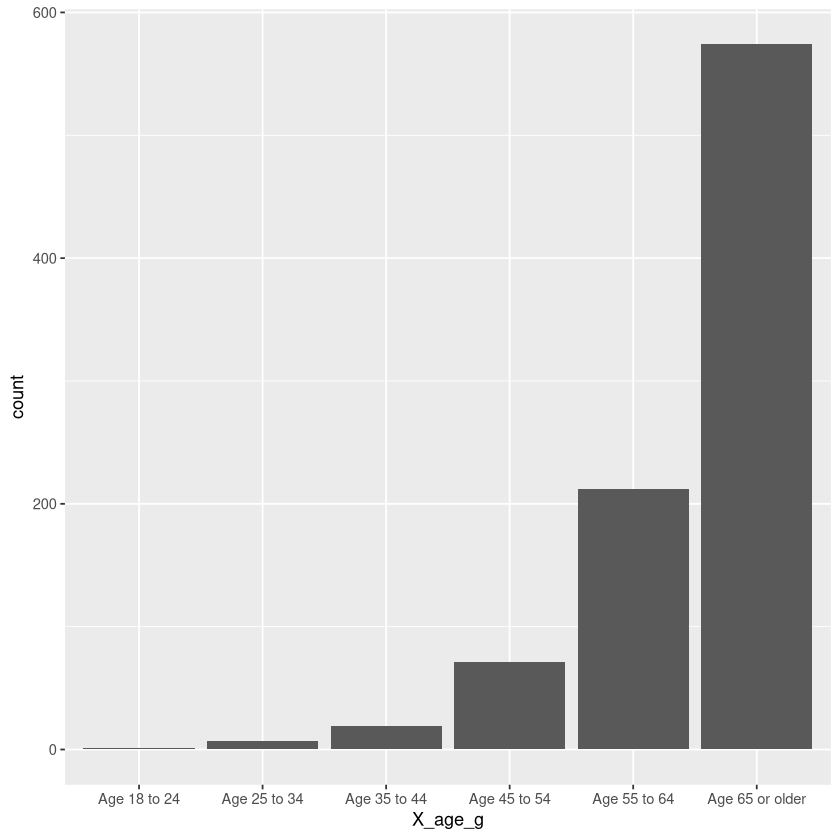

In [11]:
ggplot(sodium_intake, aes(X_age_g)) + geom_bar()

#### Is salt intake related to a vascular incident?

The following plot will analyze the sodium intake awareness in two groups: the ones who had faced a rehabilitation process after a heart attach or stroke event, and the ones who doesn't. It will noted that the difference observed is subtle, but present: those who have had an incident before, are prone to watch the salt levels consumed.

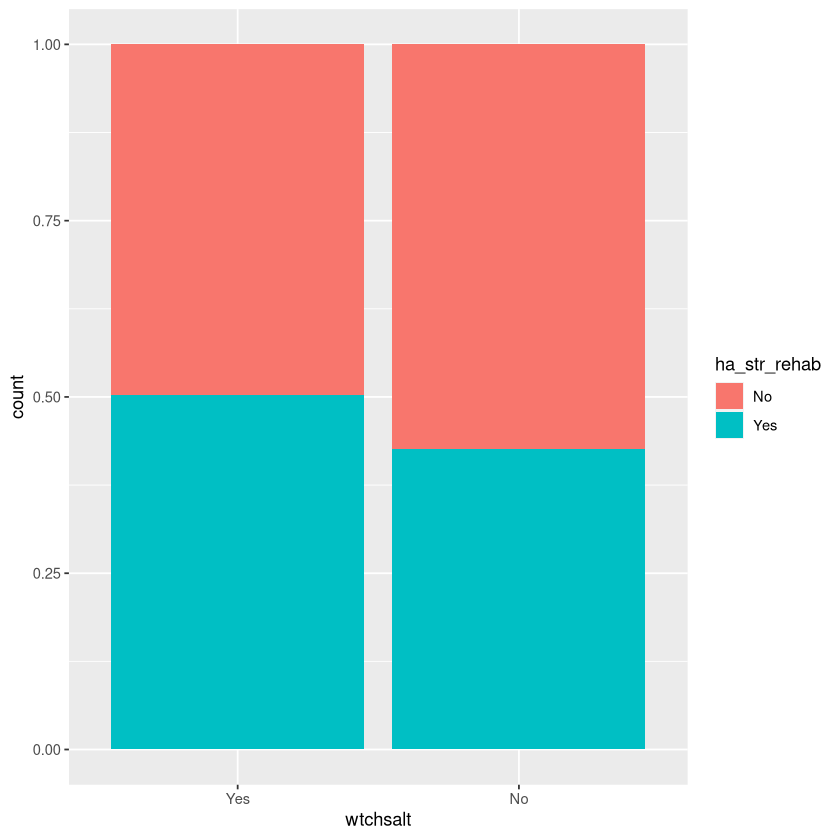

In [12]:
# Stacked + percent
ggplot(rehab_sodium, aes(fill=ha_str_rehab, y=count, x=wtchsalt)) + 
    geom_bar(position="fill", stat="identity")

#### Conclusion

The dataset studied is a subset of the BRFSS, consisting of 884 observations. These observations, as seen in the first plot are not distributed uniformly. We would expect a plot with right skew, since the older population groups represents a samller percentage of the total population. What we see instead, is the opposite. This cancels any intent of the study generalization.

What can be observed in the group under study is that those who had a vascular incident in the past, watch their sodium intake slightly more than those who doesn't. However, the difference between groups it's not significantly different. If salt intake is precursor of vascular diseases, we should observe a better behaviour (a higher percent) of those who had a stroke or heart attack incident before. Another interpretation could be that not all the vascular patients follow their doctor recommendation or may take some medicine to control the vascular risks, despite the salt consumed.

This analysis cannot be generalized for the entire US population since, the samples come from a limited amount of states and ages are not well represented. In the other hand, it cannot affirmed a correlation neither a causation of salt and vascular issues. One of the main problems is that there may be many people in the sample who started to watch salt consumption **after** an incident. General population without these issues seems not to be worried about sodium ingestion.

## Research question 2:  

- Are sugar drinks linked to diabetes? At the same time, could diabetes be correlated to other variables like drinking pure fruit juices?

### Summary Statistcs

As before, let's make first a dataset with the variables we would like to study. We're interesed in sugar drink, fruit juice and diabetes variables:

- ssbsugar: How Often Do You Drink Regular Soda Or Pop?
- ssbfrut2: How Often Did You Drink Sugar-Sweetened Drinks?
- fruitju1: How Many Times Did You Drink 100 Percent Pure Fruit Juices?
- ftjuda1_: Computed Fruit Juice Intake In Times Per Day

- pdiabtst: Had A Test For High Blood Sugar In Past Three Years
- prediab1: Ever Been Told You Have Pre-Diabetes Or Borderline Diabetes

I've chosen the pre-diabetes variables which might be a better predictor for the analysis. People with diabetes probably have changed their sugar intake habits and their information may not be useful for the analysis.

Regarding the juice intake variables, it's better to work with ftjuda1_ which has the amount of fruit juice intakes, instead the per days, weeks, month frequencies. For sugar-related drinks, this frequencies will have to be computed/transformed, before analyzing them. Lastly, we're interested wether the study subject is in the edge of diabetes, however we can check if those who has this condition have been checking their sugar levels (even if not periodically).

In [13]:
sugar <- brfss2013 %>%
    select (ssbsugar, ssbfrut2, fruitju1,
            pdiabtst, prediab1)
str(sugar)

'data.frame':	491775 obs. of  5 variables:
 $ ssbsugar: int  305 203 202 203 NA NA NA NA NA NA ...
 $ ssbfrut2: int  305 0 308 315 NA NA NA NA NA NA ...
 $ fruitju1: int  304 305 301 202 0 205 320 0 0 202 ...
 $ pdiabtst: Factor w/ 2 levels "Yes","No": 1 1 1 1 2 1 1 1 1 1 ...
 $ prediab1: Factor w/ 3 levels "Yes","Yes, during pregnancy",..: 1 3 3 3 3 3 3 1 3 3 ...


There is some work to be done with the first two variables, we want the frequency per day in int numbers. So let's do that first, inside the notes we can find the following comment:
`First number denotes numbers of times per day (1), week (2), or month (3). The remaining numbers represent the counts of times.`

We want to convert the 2XX and 3XX in numbers per day, even if the number is a fraction. For those with less than one time per month the criteria will be to replace it with ```0.5/30```.

In [14]:
sugar <- sugar %>%
    mutate(prediab1 = ifelse(prediab1 == "Yes", "Yes", prediab1)) %>%
    mutate(prediab1 = ifelse(prediab1 == 2, "No", prediab1)) %>%
    mutate(prediab1 = ifelse(prediab1 == 3, "No", prediab1)) %>% 
    mutate(prediab1 = factor(prediab1)) %>%
    # Clean ssbsugar
    mutate(ssbsugar = ifelse(ssbsugar > 300, (ssbsugar - 300)/30, ssbsugar)) %>%
    mutate(ssbsugar = ifelse(ssbsugar == 300, 0.5/30, ssbsugar)) %>%
    mutate(ssbsugar = ifelse((ssbsugar > 200 & ssbsugar < 300), (ssbsugar - 200)/7, ssbsugar)) %>%
    mutate(ssbsugar = ifelse((ssbsugar > 100 & ssbsugar < 200), ssbsugar - 100, ssbsugar)) %>%
    # Clean ssbfrut2
    mutate(ssbfrut2 = ifelse(ssbfrut2 > 300, (ssbfrut2 - 300)/30, ssbfrut2)) %>%
    mutate(ssbfrut2 = ifelse(ssbfrut2 == 300, 0.5/30, ssbfrut2)) %>%
    mutate(ssbfrut2 = ifelse((ssbfrut2 > 200 & ssbfrut2 < 300), (ssbfrut2 - 200)/7, ssbfrut2)) %>%
    mutate(ssbfrut2 = ifelse((ssbfrut2 > 100 & ssbfrut2 < 200), ssbfrut2 - 100, ssbfrut2)) %>%
    # Clean fruitju1
    mutate(fruitju1 = ifelse(fruitju1 > 300, (fruitju1 - 300)/30, fruitju1)) %>%
    mutate(fruitju1 = ifelse(fruitju1 == 300, 0.5/30, fruitju1)) %>%
    mutate(fruitju1 = ifelse((fruitju1 > 200 & fruitju1 < 300), (fruitju1 - 200)/7, fruitju1)) %>%
    mutate(fruitju1 = ifelse((fruitju1 > 100 & fruitju1 < 200), fruitju1 - 100, fruitju1))

In [15]:
sugar_test <- sugar %>%
    select(pdiabtst, prediab1) %>%
    filter(!is.na(pdiabtst), !is.na(prediab1)) %>%
    group_by(pdiabtst, prediab1) %>%
    summarize(count=n(), .groups='keep')

Next, we can create a pivot table to analyze both variables and how they correlate between them
<p>

<table>
<thead>
  <tr>
      <th></th>
      <th> Pre-Diabetic </th>
      <th></th>
      <th></th>
  <tr>
    <th>Checked Sugar?</th>
    <th>No</th>
    <th>Yes</th>
    <th>Total</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>No</td>
    <td>80988</td>
    <td>3123</td>
    <td>84111</td>
  </tr>
  <tr>
    <td>Yes</td>
    <td>120386</td>
    <td>18921</td>
    <td>139307</td>
  </tr>
  <tr>
    <td>Total</td>
    <td>201374</td>
    <td>22044</td>
    <td>223418</td>
  </tr>
</tbody>
</table>

Almost half of the population under study check their sugar levels even if they haven't had a warning before. This is a good indicator of overall health ckeck, it tells that a good amount of population, almost a 60% check their blood sugar in the group under study.

For those who had been warned before about their sugar levels, the monitoring population is higher and almost of the 85%. This tell us that people in generall has good level of awareness and take care of their sugar levels if they have been alerted before about them.

Lastly, the group who doesn't care at all about their sugar levels **despite** being warned is very small. This tell us that no matter the warnings, there's always a population who refuses to change their habits.

The discussion will follow analyzing pre-diabetes and beverages intake without further revisiting the sugar tests. Although it was interesting to analyze this two variables to see how they played together.

#### Dataset Cleaning

Next, we'll clean the dataset under study. We'll create a variable `sug_drink` to join together the pop soda and sugar sweetened drinks, for the study they'll be treated as taking part of the same set.

Some trigger levels will be used to determine if the observed patient is a regular sugar-sweetened or fruit juice drinks consumer: `sd_consumer` and `fj_consumer` respectively. We'll consider that if the patient consumes this beverages more than once a day, they're regular users.

In [16]:
sugar <- sugar %>%
    select(ssbsugar, ssbfrut2, fruitju1, prediab1) %>%
    filter(!is.na(ssbsugar), !is.na(ssbfrut2),
           !is.na(fruitju1), !is.na(prediab1)) %>%
    mutate(sug_drink = ssbfrut2 + ssbsugar) %>%
    mutate(sd_consumer = ifelse(sug_drink > 1, "Yes", "No")) %>%
    mutate(fj_consumer = ifelse(fruitju1 > 1, "Yes", "No"))


head(sugar, n=5)
dim(sugar)

,ssbsugar,ssbfrut2,fruitju1,prediab1,sug_drink,sd_consumer,fj_consumer
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<chr>
1,0.1666667,0.1666667,0.13333333,Yes,0.3333333,No,No
2,0.4285714,0.0000000,0.16666667,No,0.4285714,No,No
3,0.2857143,0.2666667,0.03333333,No,0.5523810,No,No
4,0.4285714,0.5000000,0.28571429,No,0.9285714,No,No
5,2.0000000,3.0000000,0.46666667,No,5.0000000,Yes,No


[1] 62211     7

#### Pre-Diabetics and Non Diabetics comparisions

We'll separate the population among pre-diabetics and those who don't. We'll check if they are differences in the intake rates between each group, to take some conclusions.

In [17]:
sugar_fj_sd <- sugar %>%
    select(prediab1, fj_consumer, sd_consumer) %>%
    group_by(prediab1, fj_consumer, sd_consumer) %>%
    summarise(count=n(), .groups='keep')
sugar_fj_sd

prediab1,fj_consumer,sd_consumer,count
<fct>,<chr>,<chr>,<int>
No,No,No,42364
No,No,Yes,11525
No,Yes,No,1716
No,Yes,Yes,666
Yes,No,No,4639
Yes,No,Yes,1108
Yes,Yes,No,144
Yes,Yes,Yes,49


Finally let's do some summary statistics over the variables used

In [18]:
cat("ssbsugar")
sugar %>%
    summarise(min=min(ssbsugar), median=median(ssbsugar), mean=mean(ssbsugar), max=max(ssbsugar), sd=sd(ssbsugar), N=n())
cat("ssbfrut2")
sugar %>%
    summarise(min=min(ssbfrut2),  median=median(ssbfrut2), mean=mean(ssbfrut2), max=max(ssbfrut2), sd=sd(ssbfrut2), N=n())
cat("fruitju1")
sugar %>%
    summarise(min=min(fruitju1),  median=median(fruitju1), mean=mean(fruitju1), max=max(fruitju1), sd=sd(fruitju1), N=n())
cat("sug_drink")
sugar %>%
    summarise(min=min(sug_drink), median=median(sug_drink), mean=mean(sug_drink), max=max(sug_drink), sd=sd(sug_drink), N=n())

ssbsugar

min,median,mean,max,sd,N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0.06666667,0.4108558,30,0.9350428,62211


ssbfrut2

min,median,mean,max,sd,N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0.03333333,0.3327316,30,0.8118954,62211


fruitju1

min,median,mean,max,sd,N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0.1333333,0.3985028,31,0.6758273,62211


sug_drink

min,median,mean,max,sd,N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0.1761905,0.7435874,33,1.374101,62211


The summary statistics show that all the variables under analysis are **right skewed**. For this reason, it's important to use metrics which are robust to outliers.

### Plots

Next, we'll perform some plots to visualize the data that has been analyzed before. What is most important is to answer the following questions:

- How are sugared beverages related with fruitjuice? Is it some correlation between them?
- How are the prediabetics distributed between fruit juice and sugared beverages consumers?

#### Sugar beverages vs fruit juice

The following graph represents the distribution for each person of sugar-sweetened and fruit juice intakes. It can be observed a negative correlation, almost an inverse exponential relationship. Values are concentrated in the lower-left side, where the lowest frequencies are presented. However a tendency can be observed: the patient under study tends to prefer one kind of drink over the other.

The plot has been trimmed to avoid the representation of the outliers and to focus more on the most significant part of it.

Warning message:
“Removed 162 rows containing missing values (geom_point).”


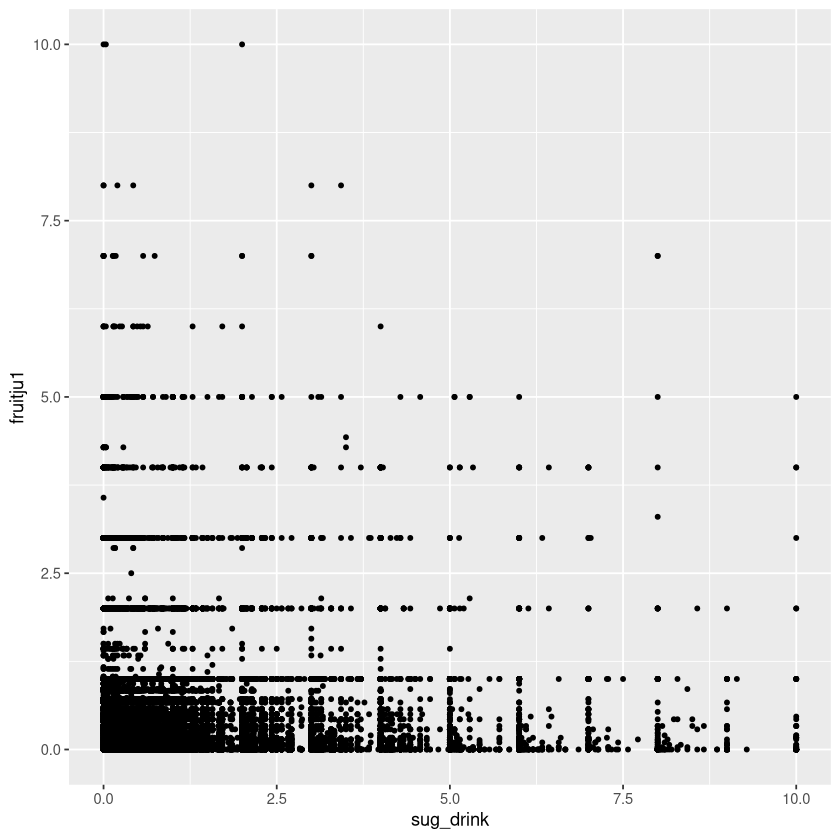

In [19]:
ggplot(sugar, aes(x=sug_drink, y=fruitju1)) +
  geom_point(size=1) + xlim(0, 10) + ylim(0,10)

#### Behaviour between type of drink and pre-diabetes patients

The following two bar plots show how the profile of consumers are distributed between prediabetic and non diabetic groups. Each plot analyse the drink type consumption:
- Sugared drinks
- Fruit juice drinks

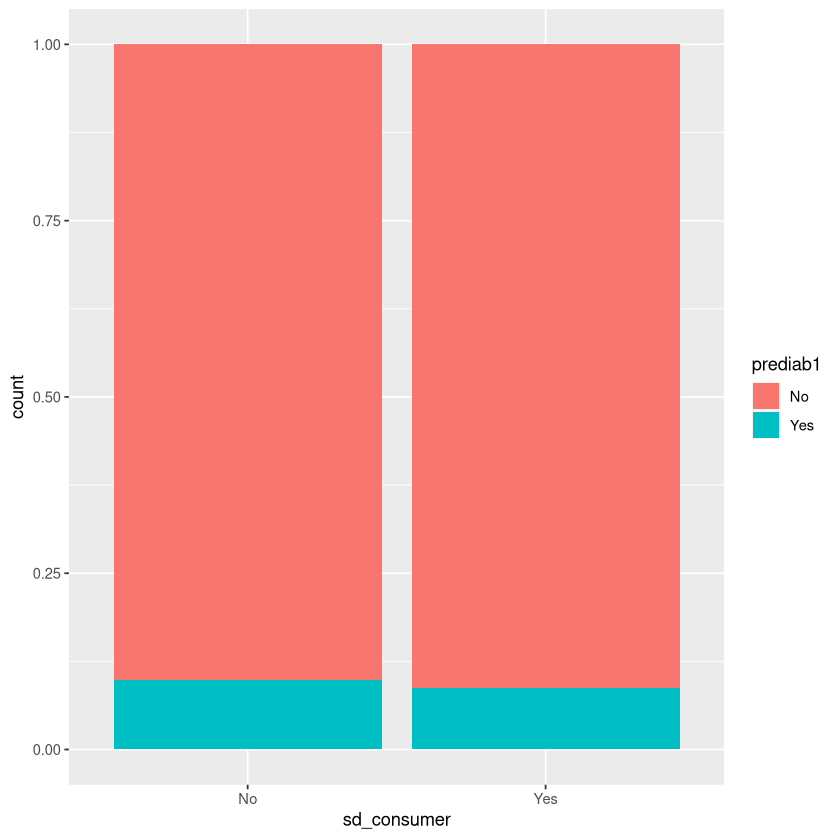

In [20]:
ggplot(sugar_fj_sd, aes(fill=prediab1, y=count, x=sd_consumer)) + 
    geom_bar(position="fill", stat="identity")

There's basically no difference in the amount of population drinking sugared drinks based in their diabetes condition. The ratios look very similar among groups.

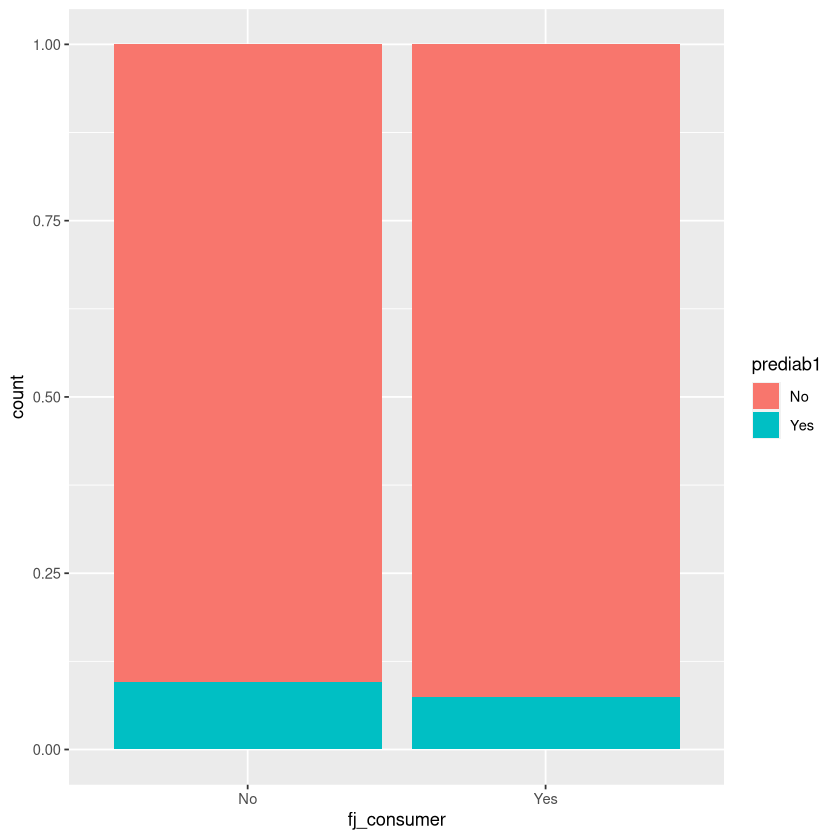

In [21]:
ggplot(sugar_fj_sd, aes(fill=prediab1, y=count, x=fj_consumer)) + 
    geom_bar(position="fill", stat="identity")

There's a slighlty fewer consumption of fruit juice in the pre-diabetic group. Some people think it's better to take care also of the sugar levels linked to fruits. Maybe this difference is not significative.

### Conclusions

The recently study presented is based in the observation of 62211 people along 7 different parameters, to determine their relationship between sugared drinks and diabetes condition, particularly pre-diabetes.

The study found that exists a negative correlation between fruit juice and sugared beverages consumption. This means that there's a group of people who tends to favor the consumption of one kind of beverages over the other. However, the vast majority has intakes which are less than one per day. This puts most of the people in the study in a safe place.

In the other hand, there is no significant evidence of changes in consumption of this beverages between pre-diabetic and non diabetic groups. There's a small drop in fruit juice consumption for the pre-diabetic group, when compared who those who does not consume them at all.

Since this represents a subset of the BRFSS survey, not all the population is represented in the same way, further studies have to be carried out, to generalize the results of these findings. Also, due to the negative relationship found between fruit juice and sugared beverages, a confounding relationship can be noticed between them.

## Research question 3:
- Do exercise reduce asthma symthomps? Does a flu shot helps to reduce the asthma symthomps? Are those variables somehow correlated?

### Summary Statistics

The following variables were selected from the codebook:

- asymptom: Asthma Symptoms During Past 30 Days
- exeroft1: How Many Times Walking, Running, Jogging, Or Swimming
- flushot6: Adult Flu Shot/Spray Past 12 Mos

From the 3 variable groups, the most important for this kind of analysis includes those which tracks if the patient has asthma symptoms regularly, as well as if he/she exercises regularly. At the same time the flu inmunized group will be used for comparison, to see if this has an effect in the asthma symptoms.

In [22]:
asthma <- brfss2013 %>%
    select (asymptom, exeroft1, flushot6)

str(asthma)

'data.frame':	491775 obs. of  3 variables:
 $ asymptom: Factor w/ 6 levels "Not at any time",..: 5 NA NA NA NA NA NA NA NA NA ...
 $ exeroft1: int  NA 105 NA 205 NA 102 220 102 102 220 ...
 $ flushot6: Factor w/ 2 levels "Yes","No": 2 1 1 2 2 1 2 1 1 2 ...


We have to convert the exercise frequencies to per week values, and clean the dataframe. Unfortunately as it'll be seen, the group to be analyzed is small.

In [23]:
asthma <- asthma %>%
    mutate(exeroft1 = ifelse(exeroft1 > 200, (exeroft1 - 200)/4, exeroft1)) %>%
    mutate(exeroft1 = ifelse(exeroft1 == 200, 0, exeroft1)) %>%
    mutate(exeroft1 = ifelse((exeroft1 > 100 & exeroft1 < 200), exeroft1 - 100, exeroft1)) %>%
    filter(!is.na(asymptom), !is.na(exeroft1), !is.na(flushot6))
head(asthma, n=10)
dim(asthma)

,asymptom,exeroft1,flushot6
,<fct>,<dbl>,<fct>
1,"Every day, all the time",5.00,Yes
2,Once or twice a week,3.50,No
3,Less than once a week,7.00,Yes
4,Not at any time,3.00,Yes
5,"Every day, but not all the time",0.25,Yes
6,Not at any time,4.00,No
7,Once or twice a week,1.00,Yes
8,Less than once a week,1.50,No
9,Once or twice a week,2.00,No


[1] 579   3

**TODO**: Comment of the dataframe dimensions. 

Let's count the people per category in each group, and check how much exercise do they take

In [24]:
asthma_exercise <- asthma %>%
    group_by(asymptom) %>%
    summarise(count=n(), exercise_median = median(exeroft1), exercise_mean = mean(exeroft1))
asthma_exercise

asymptom,count,exercise_median,exercise_mean
<fct>,<int>,<dbl>,<dbl>
Not at any time,182,3.75,4.219780
Less than once a week,121,3.00,3.396694
Once or twice a week,122,3.00,3.727459
"More than 2 times a week, but not everyday",57,3.00,3.153509
"Every day, but not all the time",49,3.00,3.709184
"Every day, all the time",48,3.00,3.968750


In [25]:
asthma_flushot = asthma %>%
    group_by(asymptom, flushot6) %>%
    summarise(count=n(), .groups='keep')

### Plot

#### Exercise distribution

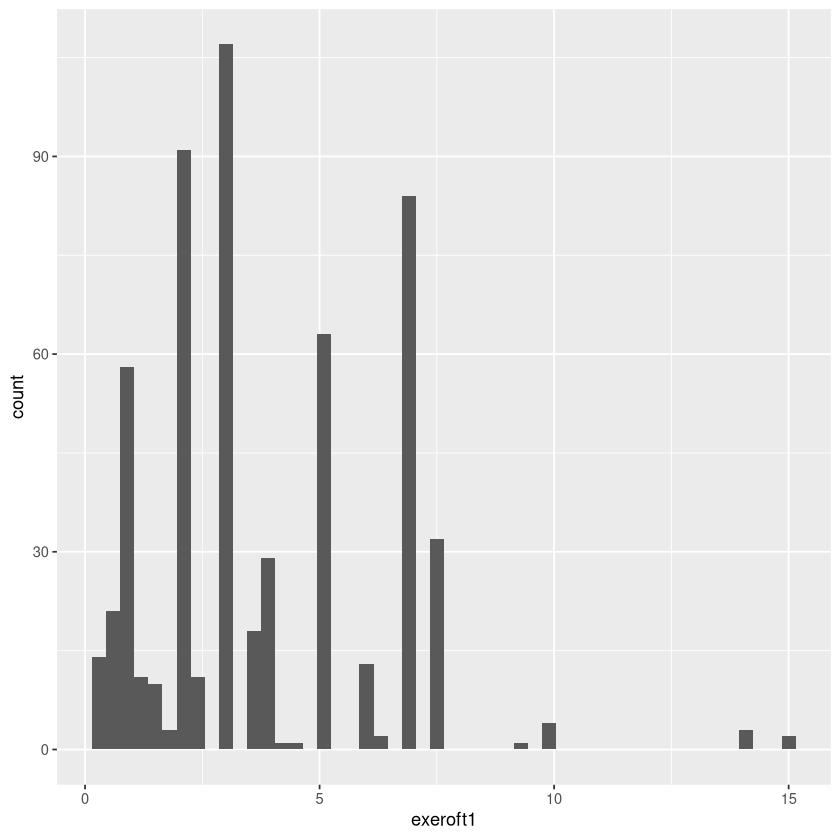

In [26]:
ggplot(asthma, aes(x=exeroft1)) + geom_histogram(binwidth = .3)

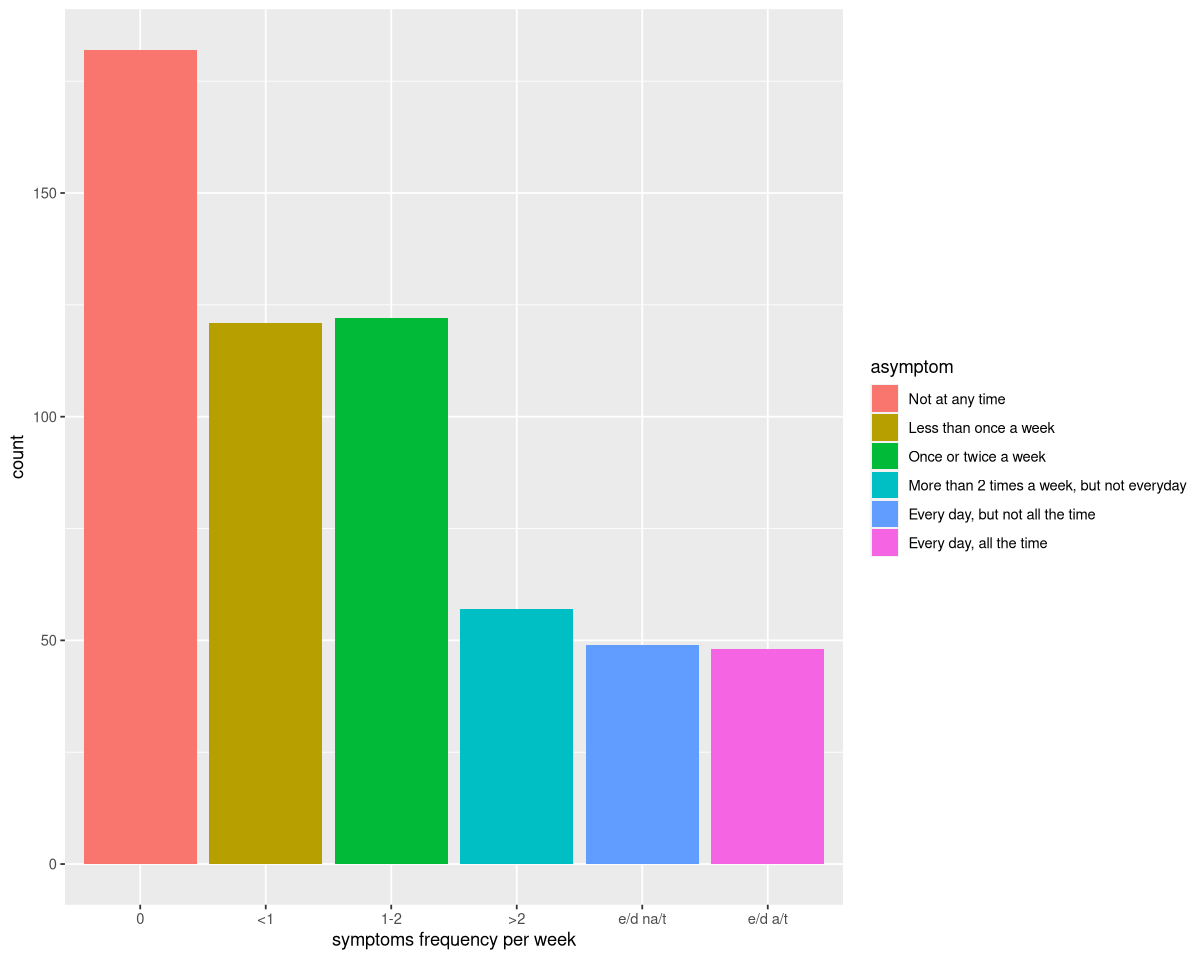

In [27]:
options(repr.plot.width=10, repr.plot.height=8)
# Stacked + percent
ggplot(asthma_exercise, aes(y=count, x=asymptom, fill=asymptom)) + 
    geom_bar(stat="identity") + 
    scale_x_discrete(labels=c('0', '<1', '1-2', '>2', 'e/d na/t', 'e/d a/t'),
                     name='symptoms frequency per week')

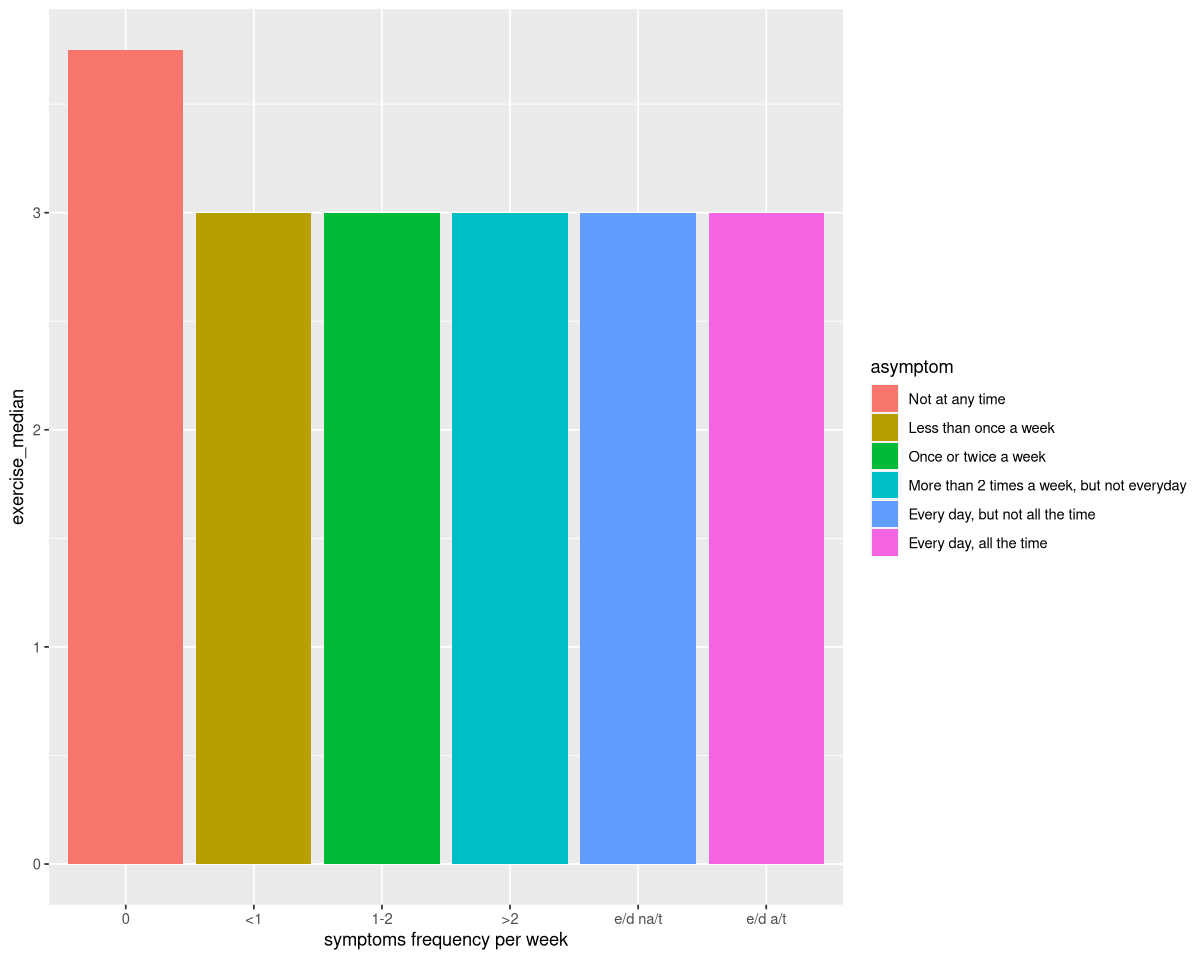

In [28]:
# Stacked + percent
ggplot(asthma_exercise, aes(y=exercise_median, x=asymptom, fill=asymptom)) + 
    geom_bar(stat="identity") + 
    scale_x_discrete(labels=c('0', '<1', '1-2', '>2', 'e/d na/t', 'e/d a/t'),
                     name='symptoms frequency per week')

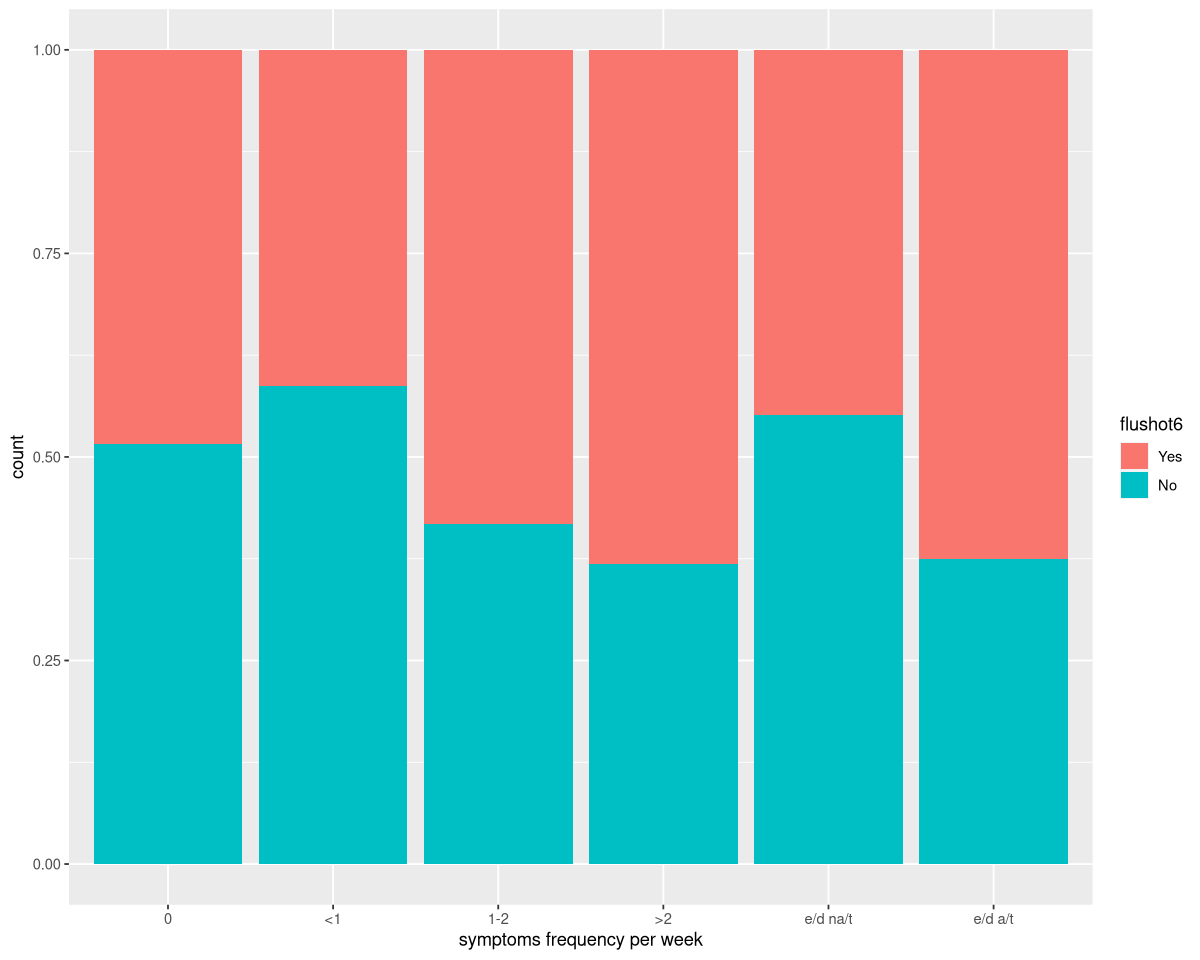

In [29]:
# Stacked + percent
ggplot(asthma_flushot, aes(fill=flushot6, y=count, x=asymptom)) + 
    geom_bar(position="fill", stat="identity") + 
    scale_x_discrete(labels=c('0', '<1', '1-2', '>2', 'e/d na/t', 'e/d a/t'),
                     name='symptoms frequency per week')
    

### Conclusions